# Cyclic Scheduling of ResNet 

The cyclic scheduling of ResNes is a bit more involved if we split `OX` wise. This is because many layers have have a stride of 2. If the split of every layer is done `OX` wise, whenever there is an stride of 2, we have to consider two execution of the previous layer per every execution of the next layer. In term of synchronous dataflow graph, this is ofter referred to as "homogeneous synchronous dataflow expansion" or hsdf expansion. The `sdf.py` file contains the logic for the hsdf expansion. In this example we omit considering data transfers for the sake of conciseness.

2023-10-31 14:37:41,946 - zigzag.classes.io.accelerator.parser.parse_accelerator_from_path +52 - INFO - Parsed accelerator with cores [0, 1, 2].
2023-10-31 14:37:41,950 - stream.classes.io.onnx.model.parse_workload_from_onnx_model_and_mapping +92 - INFO - Parsed Conv node /conv1/Conv.
2023-10-31 14:37:41,951 - stream.classes.io.onnx.model.parse_workload_from_onnx_model_and_mapping +165 - INFO - Parsed Relu node /relu/Relu. as a DummyNode
2023-10-31 14:37:41,952 - stream.classes.io.onnx.model.parse_workload_from_onnx_model_and_mapping +127 - INFO - Parsed Pooling node /maxpool/MaxPool.
2023-10-31 14:37:41,952 - stream.classes.io.onnx.model.parse_workload_from_onnx_model_and_mapping +92 - INFO - Parsed Conv node /layer1/layer1.0/conv1/Conv.
2023-10-31 14:37:41,953 - stream.classes.io.onnx.model.parse_workload_from_onnx_model_and_mapping +165 - INFO - Parsed Relu node /layer1/layer1.0/relu/Relu. as a DummyNode
2023-10-31 14:37:41,954 - stream.classes.io.onnx.model.parse_workload_from_onnx

2023-10-31 14:37:42,096 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +99 - INFO - ComputationNode(0,): Outer loops [TemporalLoop(OX,112)].
2023-10-31 14:37:42,097 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +100 - INFO - ComputationNode(0,): Generated 112 finer nodes.
2023-10-31 14:37:42,119 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +99 - INFO - ComputationNode(2,): Outer loops [TemporalLoop(OX,56)].
2023-10-31 14:37:42,119 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +100 - INFO - ComputationNode(2,): Generated 56 finer nodes.
2023-10-31 14:37:42,138 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +99 - INFO - ComputationNode(3,): Outer loops [TemporalLoop(OX,56)].
2023-10-31 14:37:42,138 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +100 - INFO - ComputationNode(3,): Generated 56 finer nodes.
2023-10-31 14:37:42,154 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +99 - INFO - ComputationNode(5,): 

2023-10-31 14:37:42,315 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +99 - INFO - ComputationNode(44,): Outer loops [TemporalLoop(K,2)].
2023-10-31 14:37:42,316 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +100 - INFO - ComputationNode(44,): Generated 2 finer nodes.
2023-10-31 14:37:42,316 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +99 - INFO - ComputationNode(46,): Outer loops [TemporalLoop(K,2)].
2023-10-31 14:37:42,317 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +100 - INFO - ComputationNode(46,): Generated 2 finer nodes.
2023-10-31 14:37:42,318 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +99 - INFO - ComputationNode(48,): Outer loops [TemporalLoop(K,2)].
2023-10-31 14:37:42,318 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +100 - INFO - ComputationNode(48,): Generated 2 finer nodes.
2023-10-31 14:37:42,410 - stream.classes.stages.GenerateCNWorkloadHybridStage.run +133 - INFO - Finer graph: DiGraph with

2023-10-31 14:37:58,586 - zigzag.classes.opt.temporal.loma.engine.run +72 - INFO - Running temporal mapping search engine...
2023-10-31 14:37:58,692 - stream.classes.stages.IntraCoreMappingStage.get_intra_core_mapping_flow +220 - INFO - Launching intra-core mapping optimization for ComputationNode(24, 0) -> core 1 ...
2023-10-31 14:37:58,692 - zigzag.classes.stages.SpatialMappingGeneratorStage.run +89 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 16), 'D2': ('C', 16)}.
2023-10-31 14:37:58,693 - zigzag.classes.opt.temporal.loma.engine.run +72 - INFO - Running temporal mapping search engine...
2023-10-31 14:38:00,226 - stream.classes.stages.IntraCoreMappingStage.get_intra_core_mapping_flow +220 - INFO - Launching intra-core mapping optimization for ComputationNode(27, 0) -> core 1 ...
2023-10-31 14:38:00,227 - zigzag.classes.stages.SpatialMappingGeneratorStage.run +89 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 16), 'D2': ('C', 16)}.
2023-10-31 14:38:00,229 - zigzag.class

2023-10-31 14:38:13,518 - stream.visualization.schedule.visualize_timeline_plotly +562 - INFO - Plotted schedule timeline using Plotly to outputs/schedule.html.
2023-10-31 14:38:13,519 - stream.visualization.schedule.plot_timeline_brokenaxes +64 - INFO - Plotting...


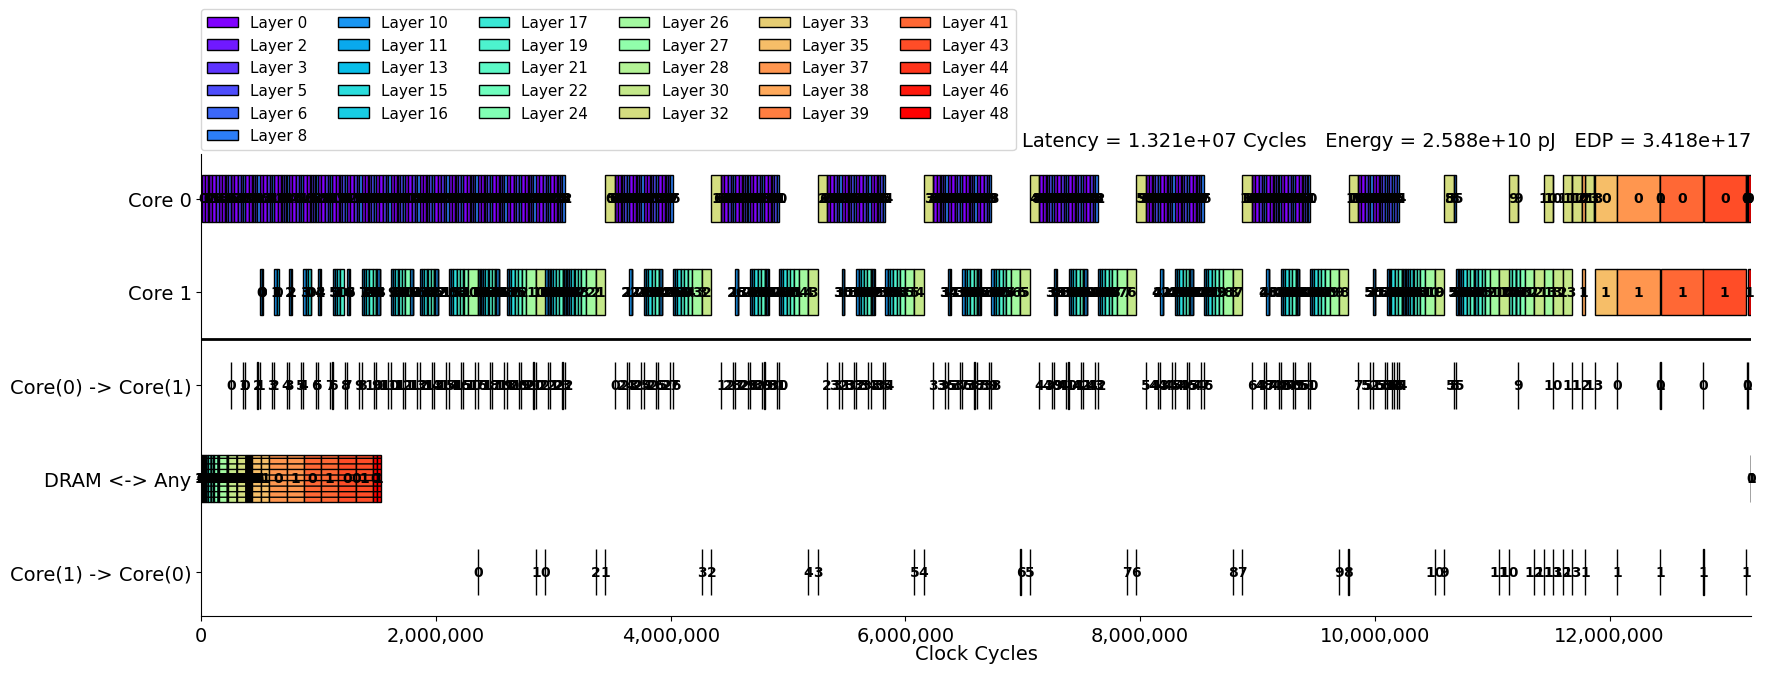

2023-10-31 14:38:17,805 - stream.visualization.schedule.plot_timeline_brokenaxes +318 - INFO - Plotted schedule timeline to outputs/schedule.png


<Figure size 640x480 with 0 Axes>

In [2]:
from zigzag.classes.stages import *
from stream.classes.stages import *
from stream.visualization.schedule import (
    plot_timeline_brokenaxes,
    visualize_timeline_plotly,
)
from stream.visualization.memory_usage import plot_memory_usage
from stream.inputs.examples.hardware.cores.TPU_like import get_core as get_tpu_core
from stream.inputs.examples.hardware.cores.offchip import get_offchip_core
from stream.inputs.examples.hardware.nocs.mesh_2d import get_2d_mesh
from zigzag.classes.hardware.architecture.accelerator import Accelerator
from zigzag.classes.stages.Stage import Stage
import pickle

import logging as _logging

_logging_level = _logging.INFO
_logging_format = (
    "%(asctime)s - %(name)s.%(funcName)s +%(lineno)s - %(levelname)s - %(message)s"
)
_logging.basicConfig(level=_logging_level, format=_logging_format)


node_performances = None
class GetNodeHwPerformances(Stage):
    def __init__(self, list_of_callables, *args, node_hw_performances, **kwargs):
        super().__init__(list_of_callables, node_hw_performances=node_hw_performances, **kwargs)
        global node_performances
        node_performances = node_hw_performances
        
    def run(self):
        substage = self.list_of_callables[0](self.list_of_callables[1:], **self.kwargs)
        for cme, extra_info in substage.run():
            yield cme, extra_info
        


################################INPUTS################################
cores = [get_tpu_core(id) for id in range(2)]  # 2 identical cores
offchip_core = get_offchip_core(id=2)

CN_define_mode = 3  # manually define outer-CN loops
hint_loops = [[("OX", "all")], [("K", 2)]]
layer_cutoffs = [34]
nb_ga_individuals = 2  # number of individuals in each generation
nb_ga_generations = 1  # number of genetic algorithm generations
######################################################################

############PLOTTING#############
plot_full_schedule = True
draw_dependencies = False
plot_data_transfer = True
#################################


################################PATHS################################
node_hw_performances_path = f"./core-layer-mapping.pickle"
scme_path = f"outputs/scme.pickle"
timeline_fig_path_plotly = f"outputs/schedule.html"
timeline_fig_path_matplotlib = f"outputs/schedule.png"
memory_fig_path = f"outputs/memory.png"
#####################################################################

mainstage = MainStage(
    [  # Initializes the MainStage as entry point
        AcceleratorParserStage,  # Parses the accelerator
        StreamONNXModelParserStage,  # Parses the ONNX Model into the workload
        # UserDefinedModelParserStage,  # Parses the user-defined Model into the workload
        GenerateCNWorkloadHybridStage,
        IntraCoreMappingStage,
        GetNodeHwPerformances,
        InterCoreMappingStage,
    ],
    accelerator="architecture.eyeriss_like_dual_core",  # required by AcceleratorParserStage
    workload_path="./problems/resnet18.onnx",  # required by ModelParserStage
    mapping_path="mapping.resnet_mapping",  # required by ModelParserStage
    loma_lpf_limit=6,  # required by LomaStage
    nb_ga_individuals=nb_ga_individuals,  # number of individuals in each genetic algorithm generation
    nb_ga_generations=nb_ga_generations,  # number of genetic algorithm generations
    node_hw_performances_path=node_hw_performances_path,  # saved node_hw_performances to skip re-computation
    plot_hof=True,  # Save schedule and memory usage plot of each individual in the Genetic Algorithm hall of fame
    plot_file_name="plot",
    plot_full_schedule=plot_full_schedule,
    plot_data_transfer=plot_data_transfer,
    cn_define_mode=CN_define_mode,
    hint_loops=hint_loops,
    layer_cutoffs=layer_cutoffs,
    scheduler_candidate_selection="memory",
    operands_to_prefetch=[],
)

scme, _ = mainstage.run()
scme = scme[0]

visualize_timeline_plotly(
    scme,
    draw_dependencies=draw_dependencies,
    draw_communication=plot_data_transfer,
    fig_path=timeline_fig_path_plotly,
)

plot_timeline_brokenaxes(
    scme,
    draw_dependencies,
    section_start_percent=(0,),
    percent_shown=(100,),
    plot_data_transfer=plot_data_transfer,
    fig_path=timeline_fig_path_matplotlib,
)

2023-10-31 14:38:22,468 - stream.visualization.schedule.plot_timeline_brokenaxes +64 - INFO - Plotting...


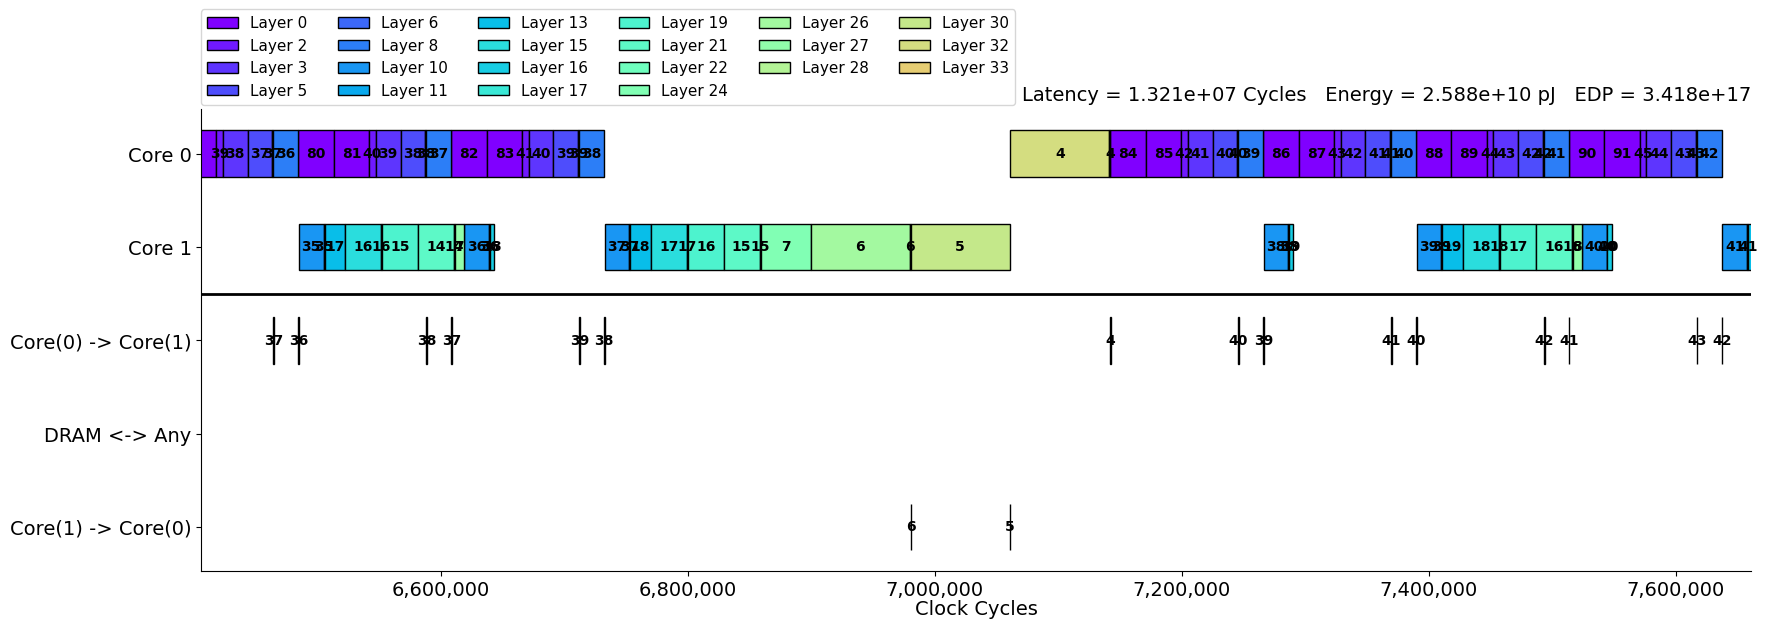

2023-10-31 14:38:23,141 - stream.visualization.schedule.plot_timeline_brokenaxes +318 - INFO - Plotted schedule timeline to outputs/schedule.png


<Figure size 640x480 with 0 Axes>

In [3]:
plt = plot_timeline_brokenaxes(
    scme,
    draw_dependencies,
    section_start_percent=(48.5,),
    percent_shown=(9.5,),
    plot_data_transfer=plot_data_transfer,
    fig_path=timeline_fig_path_matplotlib,
)

In [4]:
for k, item in node_performances.items():
    print(k.memory_operand_links)
    print(f"Layer {k.id[0]} {k.name}")
    for op in k.operand_tensors.keys():
        tensor = k.operand_tensors[op]
        operand_precision = k.operand_precision[op]
        print(f"\t{op}: size={tensor.size} operand-size={operand_precision} loops= {','.join(map(lambda x: f'{x[0]}:[{x[1][0]}..{x[1][1]})', zip(tensor.loop_dimensions, tensor.loop_ranges)))}")
    print("\n\t\tLatency\tEnergy")
    for core, cme in item.items():
        print(f"\tCore {core.id}:\t{cme.latency_total1}\t{cme.energy_total}") #TODO: consider offchip energy
    print()

{'O': 'O', 'W': 'I2', 'I': 'I1'}
Layer 0 /conv1/Conv
	O: size=57344 operand-size=16 loops= B:[0..1),G:[0..1),K:[0..64),OY:[0..112),OX:[0..1)
	W: size=75264 operand-size=8 loops= K:[0..64),C:[0..3),FY:[0..7),FX:[0..7)
	I: size=38472 operand-size=8 loops= B:[0..1),G:[0..1),C:[0..3),IY:[-3..226),IX:[-3..4)

		Latency	Energy
	Core 0:	28721	10160933.0

{'O': 'O', 'W': 'I2', 'I': 'I1'}
Layer 2 /maxpool/MaxPool
	O: size=28672 operand-size=8 loops= B:[0..1),K:[0..64),OY:[0..56),OX:[0..1)
	W: size=0 operand-size=0 loops= FY:[0..3),FX:[0..3)
	I: size=173568 operand-size=8 loops= B:[0..1),K:[0..64),IY:[-1..112),IX:[-1..2)

		Latency	Energy
	Core 0:	5262	3550528.0

{'O': 'O', 'W': 'I2', 'I': 'I1'}
Layer 3 /layer1/layer1.0/conv1/Conv
	O: size=28672 operand-size=16 loops= B:[0..1),G:[0..1),K:[0..64),OY:[0..56),OX:[0..1)
	W: size=294912 operand-size=8 loops= K:[0..64),C:[0..64),FY:[0..3),FX:[0..3)
	I: size=89088 operand-size=8 loops= B:[0..1),G:[0..1),C:[0..64),IY:[-1..57),IX:[-1..2)

		Latency	Energ

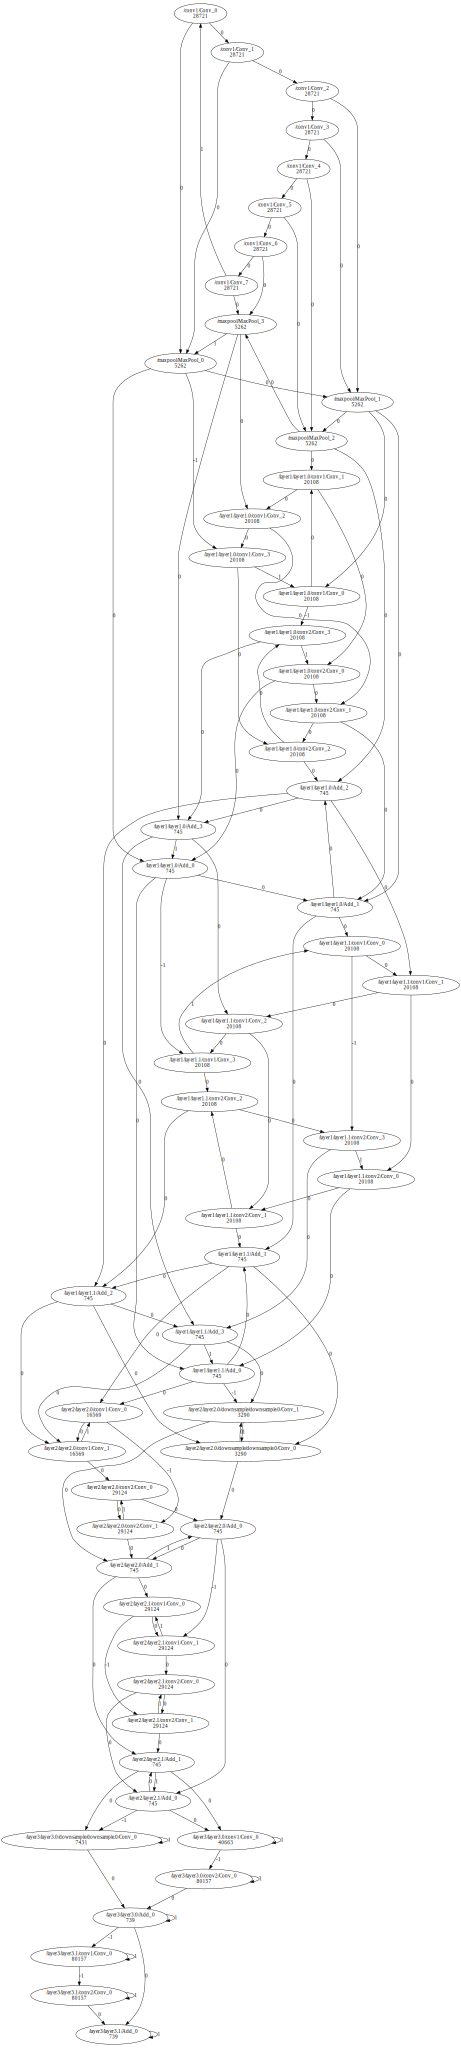

In [7]:
from matplotlib import colormaps
from matplotlib.colors import to_hex
import numpy as np
from mapping.resnet_mapping import mapping
from sdf import MultirateSDF
sdf = MultirateSDF()

sdf.add_processor("Core 0")
sdf.add_processor("Core 1")
sdf.add_processor("DRAM -> Any")

cm = colormaps.get_cmap('rainbow')

colors = [to_hex(c) for c in cm(np.linspace(0, 1, len(set(k.id[0] for k in node_performances.keys()))))]

for i, (k, item) in enumerate(node_performances.items()):
    identity = k.id[0]
    if identity >= layer_cutoffs[0]:
        break
    core, cme = next(iter(item.items()))
    if 0 <= identity < 1:
        repetition = 8
    elif 1 <= identity < 13:
        repetition = 4
    elif 13 <= identity < 24:
        repetition = 2
    else:
        repetition = 1
    sdf.add_actor(k.name, cme.latency_total1, f"Core {core.id}", repetition, color=colors[i])
    sdf.add_channel(k.name, k.name, 1)

sdf.add_channel("/conv1/Conv", "/maxpool/MaxPool")
sdf.add_channel("/maxpool/MaxPool", "/layer1/layer1.0/conv1/Conv", -1)
sdf.add_channel("/layer1/layer1.0/conv1/Conv", "/layer1/layer1.0/conv2/Conv", -1)
sdf.add_channel("/maxpool/MaxPool", "/layer1/layer1.0/Add")
sdf.add_channel("/layer1/layer1.0/conv2/Conv", "/layer1/layer1.0/Add")

sdf.add_channel("/layer1/layer1.0/Add", "/layer1/layer1.1/conv1/Conv", -1)
sdf.add_channel("/layer1/layer1.1/conv1/Conv", "/layer1/layer1.1/conv2/Conv", -1)
sdf.add_channel("/layer1/layer1.1/conv2/Conv", "/layer1/layer1.1/Add")
sdf.add_channel("/layer1/layer1.0/Add", "/layer1/layer1.1/Add")

sdf.add_channel("/layer1/layer1.1/Add", "/layer2/layer2.0/conv1/Conv")
sdf.add_channel("/layer2/layer2.0/conv1/Conv", "/layer2/layer2.0/conv2/Conv", -1)
sdf.add_channel("/layer1/layer1.1/Add", "/layer2/layer2.0/downsample/downsample.0/Conv", -1)
sdf.add_channel("/layer2/layer2.0/conv2/Conv", "/layer2/layer2.0/Add")
sdf.add_channel("/layer2/layer2.0/downsample/downsample.0/Conv", "/layer2/layer2.0/Add")

sdf.add_channel("/layer2/layer2.0/Add", "/layer2/layer2.1/conv1/Conv", -1)
sdf.add_channel("/layer2/layer2.1/conv1/Conv", "/layer2/layer2.1/conv2/Conv", -1)
sdf.add_channel("/layer2/layer2.1/conv2/Conv", "/layer2/layer2.1/Add")
sdf.add_channel("/layer2/layer2.0/Add", "/layer2/layer2.1/Add")

sdf.add_channel("/layer2/layer2.1/Add", "/layer3/layer3.0/conv1/Conv")
sdf.add_channel("/layer3/layer3.0/conv1/Conv", "/layer3/layer3.0/conv2/Conv", -1)
sdf.add_channel("/layer2/layer2.1/Add", "/layer3/layer3.0/downsample/downsample.0/Conv", -1)
sdf.add_channel("/layer3/layer3.0/conv2/Conv", "/layer3/layer3.0/Add")
sdf.add_channel("/layer3/layer3.0/downsample/downsample.0/Conv", "/layer3/layer3.0/Add")

sdf.add_channel("/layer3/layer3.0/Add", "/layer3/layer3.1/conv1/Conv", -1)
sdf.add_channel("/layer3/layer3.1/conv1/Conv", "/layer3/layer3.1/conv2/Conv", -1)
sdf.add_channel("/layer3/layer3.1/conv2/Conv", "/layer3/layer3.1/Add")
sdf.add_channel("/layer3/layer3.0/Add", "/layer3/layer3.1/Add")

problem = sdf.into_cyclic_scheduling_problem(lambda name, i: f"{name}_{i}")
problem

In [8]:
solution = problem.solve()

Set parameter Username


2023-10-31 14:39:02,319 - gurobipy.gurobipy.__init__ +104 - INFO - Set parameter Username


Academic license - for non-commercial use only - expires 2024-07-23


2023-10-31 14:39:02,321 - gurobipy.gurobipy.__init__ +104 - INFO - Academic license - for non-commercial use only - expires 2024-07-23


In [9]:
solution.plot_with_processors()

CyclicSchedulingPlot(data='{"problem": {"actors": [{"name": "/conv1/Conv_0", "execution_time": 28721, "process…